In [1]:
import os, sys
os.environ["MALLOC_TRIM_THRESHOLD_"] = '0'
import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(16,4))
plt.rc("font", size=14)
ccrs.PlateCarree()

from dask.distributed import Client, LocalCluster
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4, protocol = 'tcp://', host = '137.129.155.67')
client = Client(cluster)
client



Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:8787/status,
Dashboard: http://137.129.155.67:8787/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: tcp://137.129.155.67:47125,Workers: 1
Dashboard: http://137.129.155.67:8787/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: tcp://137.129.155.67:47927,Total threads: 4
Dashboard: http://137.129.155.67:39897/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
indir_data_FILTERED = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/VARIANCE/ANOMALY_FILTERED/'
indir_data_RAW = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/VARIANCE/RAW_ANOMALY/'
ds_FILTER = xr.open_mfdataset(indir_data_FILTERED + 'OLR_JAS.nc', chunks = {'time' : 1}, parallel = True)
ds_RAW = xr.open_mfdataset(indir_data_RAW + 'OLR_JAS.nc', chunks = {'time' : 1}, parallel = True)

ds_FILTER = ds_FILTER.isel(lat = slice(0,None,2), lon = slice(0,None,2))
ds_RAW = ds_RAW.isel(lat = slice(0,None,2), lon = slice(0,None,2))

In [3]:
indir_smot = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/SMOTHED_CLIM/'
ds_smot = xr.open_mfdataset(indir_smot+'clim_OLR_smooth_ERA5_2000_2020.nc', chunks = {'time' : 1}, parallel=True)

mask = ds_smot.mean('time')
mask = mask.compute()

In [4]:
var = ['OLR_MRG','OLR_Kelvin','OLR_Rossby','OLR_TD','OLR_MJO']
ds_Var = ds_FILTER.copy()
ds_Var = ds_Var*0.
da_RAW = ds_RAW['OLR_ano']
for v in var :
    da_FILTER = ds_FILTER[v].copy()
    ds_Var[v] = da_FILTER/da_RAW

ds_Var

<xarray.Dataset>
Dimensions:     (lat: 30, lon: 180)
Coordinates:
  * lat         (lat) float32 -29.5 -27.5 -25.5 -23.5 ... 22.5 24.5 26.5 28.5
  * lon         (lon) float32 0.5 2.5 4.5 6.5 8.5 ... 352.5 354.5 356.5 358.5
Data variables:
    OLR_Kelvin  (lat, lon) float64 dask.array<chunksize=(30, 180), meta=np.ndarray>
    OLR_Rossby  (lat, lon) float64 dask.array<chunksize=(30, 180), meta=np.ndarray>
    OLR_MJO     (lat, lon) float64 dask.array<chunksize=(30, 180), meta=np.ndarray>
    OLR_MRG     (lat, lon) float64 dask.array<chunksize=(30, 180), meta=np.ndarray>
    OLR_EIG     (lat, lon) float64 dask.array<chunksize=(30, 180), meta=np.ndarray>
    OLR_WIG     (lat, lon) float64 dask.array<chunksize=(30, 180), meta=np.ndarray>
    OLR_TD      (lat, lon) float64 dask.array<chunksize=(30, 180), meta=np.ndarray>
    OLR_LF      (lat, lon) float64 dask.array<chunksize=(30, 180), meta=np.ndarray>

In [5]:
map_proj = ccrs.Mercator(central_longitude=180.0, 
                         min_latitude=-20.1, 
                         max_latitude=20.1,
                         globe=None)

# plt.rc("figure", figsize=(20,14))
cmap ='jet'



vmin, vmax = 0., 0.5

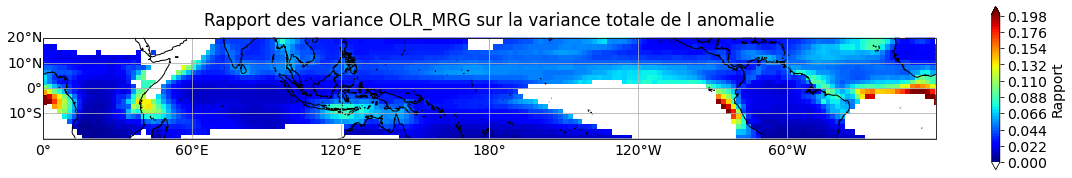

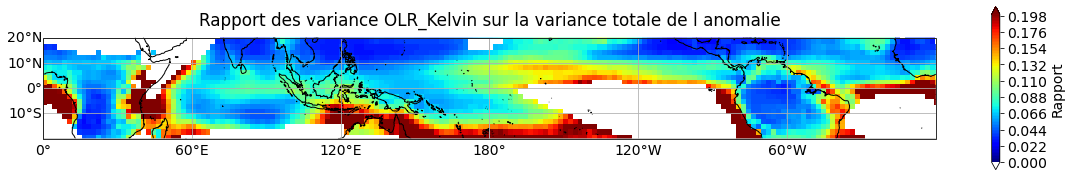

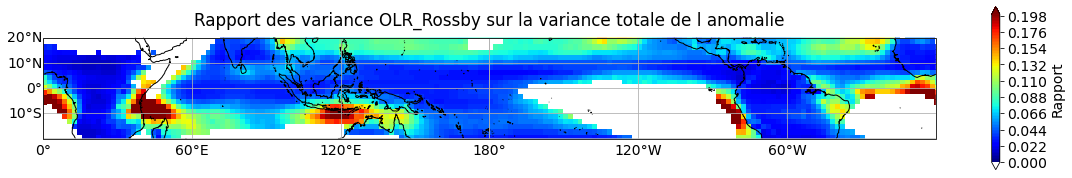

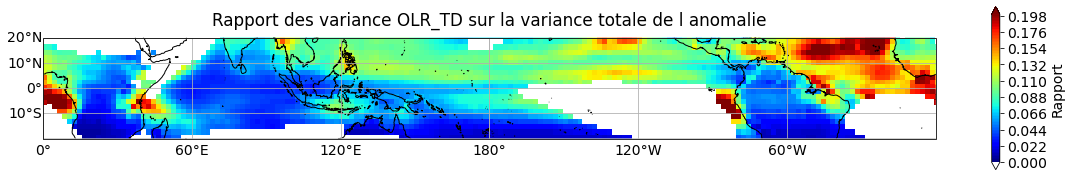

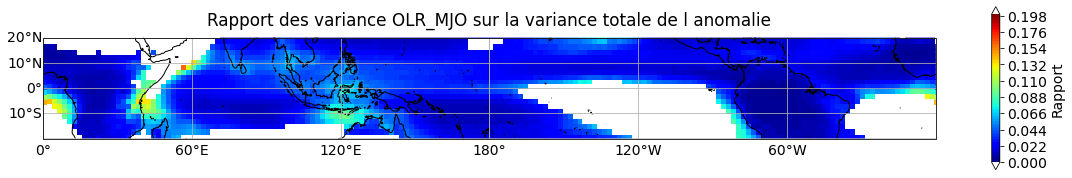

In [6]:
plt.rc("figure", figsize=(20,3))

colorbar = {'label': 'Rapport',
            'orientation': 'vertical' ,
            'extend' : 'both'}

for v in var :
    #####################################################################################
    fig, axis = plt.subplots(
        1, 1, subplot_kw={'projection': map_proj})

    ds_Var[v].where(mask.toa_lw_all_1h < 275).plot(ax=axis, levels = 101, 
                        transform=ccrs.PlateCarree(),
                        cmap=cmap , vmin = 0, vmax = 0.2,
                        cbar_kwargs=colorbar)


    axis.coastlines()
    gl = axis.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    plt.title('Rapport des variance ' + v + ' sur la variance totale de l anomalie JAS')
    plt.show()

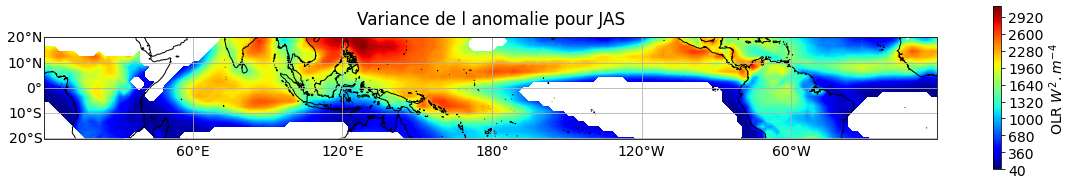

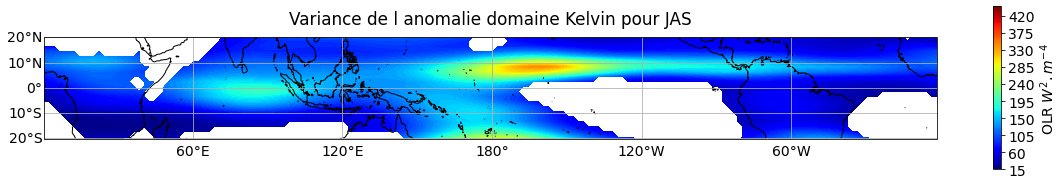

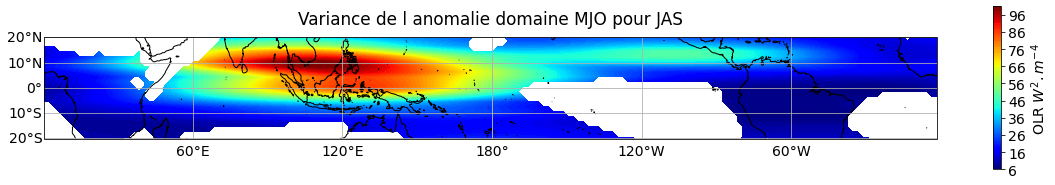

In [7]:
da_RAW
plt.rc("figure", figsize=(20,3))
colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both'}

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

da_RAW.where(mask.toa_lw_all_1h < 275).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)


axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Variance de l anomalie pour JAS')
plt.show()

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_FILTER['OLR_Kelvin'].where(mask.toa_lw_all_1h < 275).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)


axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Variance de l anomalie domaine Kelvin pour JAS')
plt.show()

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_FILTER['OLR_MJO'].where(mask.toa_lw_all_1h < 275).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)


axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Variance de l anomalie domaine MJO pour JAS')
plt.show()

In [8]:
ds_anomalie = xr.open_mfdataset('/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/OLR/anom_OLR_brut_ERA5_3H_*.nc', 
                                chunks = {'time' : -1, 'lat' : 20}, parallel = True)
# months =  [1,2,3] # for example
# ds_anomalie = ds_anomalie.sel(time = np.in1d(ds_anomalie['time.month'], months))

ds_anomalie = ds_anomalie.isel(lat = slice(0,None,2), lon = slice(0,None,2))

In [9]:
plt.rc("figure", figsize=(12,10))

ds_anomalie['OLR_ano'].isel(lat = 0, lon = 180, time = slice(0,8*8)).plot()
plt.grid()

IndexError: Index is not smaller than dimension 180 >= 180

In [10]:
import xrft

time_save = ds_anomalie.time
OLRhat = ds_anomalie['OLR_ano'].chunk({'time' : -1})
OLRhat = xrft.fft(OLRhat, dim="time", true_phase=False, true_amplitude=True).persist()
_OLRhat = xr.where(OLRhat.freq_time <= -1/(86400*1),  0, OLRhat)
_OLRhat = xr.where(_OLRhat.freq_time >= 1/(86400*1),  0., _OLRhat)
OLRhat = OLRhat - _OLRhat

print(_OLRhat.sel(freq_time = -4.63e-05, method = 'nearest').values)
print(OLRhat.sel(freq_time = -4.63e-05, method = 'nearest').values)

# OLR_v = xrft.ifft(OLRhat, dim = 'freq_time', true_phase=False, true_amplitude=True) # Signal in direct space
# OLR_v = OLR_v.real.persist()


# OLRhat = xrft.fft(OLR_v.chunk({'time' : -1}), dim="time", true_phase=False, true_amplitude=True)
# OLRhat = xr.where(OLRhat.freq_time <= -1/(86400*90),  0., OLRhat)
# OLRhat = xr.where(OLRhat.freq_time >= 1/(86400*90),  0., OLRhat)
OLR_v_J = xrft.ifft(OLRhat, dim = 'freq_time', true_phase=False, true_amplitude=True).persist() # Signal in direct space
OLR_v_WJ = xrft.ifft(_OLRhat, dim = 'freq_time', true_phase=False, true_amplitude=True).persist() # Signal in direct space

# OLR_v = OLR_v.real.compute()
# OLR_v
# ds_VARRRR = OLR_v.var(dim = 'time').compute()

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]
[[-3.45052025e+06+0.00000000e+00j -5.47616049e+06+5.83213478e-09j
  -5.30251802e+07-1.22781785e-09j ...  1.53869742e+07+2.94676283e-08j
  -1.42201933e+07+8.28777047e-09j -1.15801502e+07+0.00000000e+00j]
 [ 1.12978181e+07+7.36690708e-09j -5.47931349e+07-2.14868123e-09j
  -3.17568961e+06+2.45563569e-09j ... -1.45509286e+07+3.68345354e-09j
   1.30329893e+07-6.13908924e-10j -9.82150165e+06+1.22781785e-09j]
 [-4.33135549e+07+1.16642696e-08j -2.16311838e+07+6.13908924e-09j
  -1.91492201e+07+1.22781785e-09j ... -8.75941071e+06+4.91127139e-09j
  -6.83565942e+04+7.98081601e-09j -7.97043825e+06+7.36690708e-09j]
 ...
 [-5.46837419e+08-4.91127139e-09j -6.68578064e+08-2.70119926e-08j
  -6.91822447e+08-2.

/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/xrft/xrft.py:556: FutureWarning: Default idft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/xrft/xrft.py:556: FutureWarning: Default idft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


In [11]:
OLR_v_WJ = OLR_v_WJ.real
OLR_v_WJ['time'] = time_save
months =  [7,8,9] # for example
OLR_v = OLR_v_WJ.sel(time = np.in1d(OLR_v_WJ['time.month'], months)).compute()
OLR_v = OLR_v.var('time').compute()

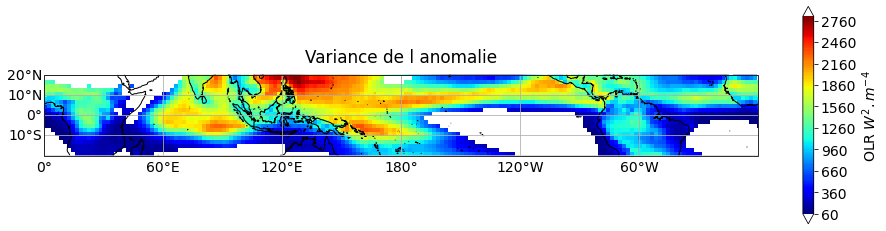

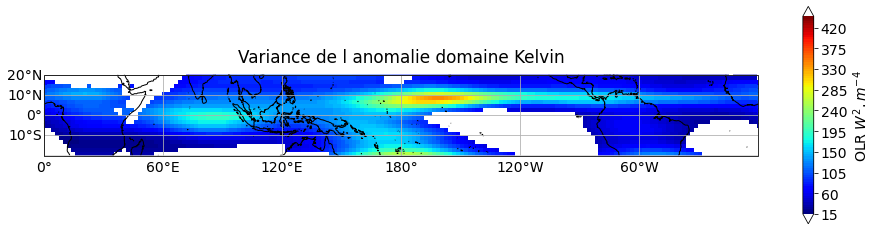

In [12]:
da_RAW
plt.rc("figure", figsize=(16,4))

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

OLR_v.where(mask.toa_lw_all_1h < 275).plot(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)


axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Variance de l anomalie')
plt.show()

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_FILTER['OLR_Kelvin'].where(mask.toa_lw_all_1h < 275).plot(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)


axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Variance de l anomalie domaine Kelvin')
plt.show()

In [13]:
_da = ds_FILTER['OLR_Kelvin']/OLR_v

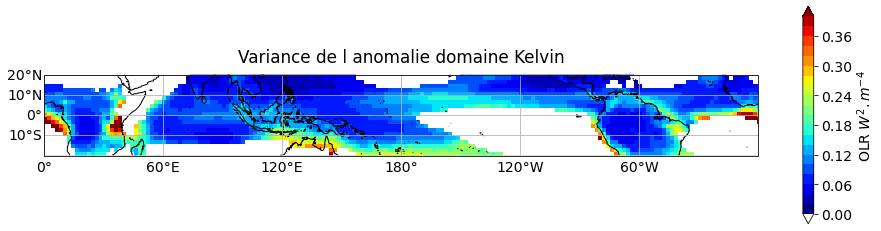

In [21]:
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

_da.where(mask.toa_lw_all_1h < 270).plot(ax=axis, levels = 21, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmax = 0.4, vmin = 0,
                    cbar_kwargs=colorbar)


axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Variance de l anomalie domaine Kelvin')
plt.show()

In [ ]:
var = ['OLR_MRG','OLR_Kelvin','OLR_Rossby','OLR_TD','OLR_MJO']
ds_Var = ds_FILTER.copy()
ds_Var = ds_Var*0.

for v in var :
    da_FILTER = ds_FILTER[v].copy()
    ds_Var[v] = da_FILTER/OLR_v

ds_Var

for v in var :
    #####################################################################################
    fig, axis = plt.subplots(
        1, 1, subplot_kw={'projection': map_proj})

    ds_Var[v].where(mask.toa_lw_all_1h < 270).plot(ax=axis, levels = 101, 
                        transform=ccrs.PlateCarree(),
                        cmap=cmap , vmin = 0, vmax = 0.5,
                        cbar_kwargs=colorbar)


    axis.coastlines()
    gl = axis.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    plt.title('Rapport des variance ' + v + ' sur la variance totale de l anomalie')
    plt.show()